Vaccine posterior: Beta(9, 18191)
Placebo posterior: Beta(163, 18050)

Posterior mean pi_v = 0.000495
Posterior mean pi_p = 0.008950

VE posterior mean = 0.944
VE posterior median = 0.947
VE 95% CrI = [0.901, 0.975]



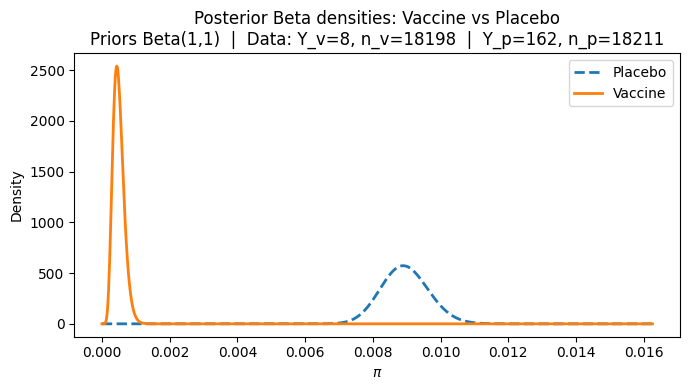

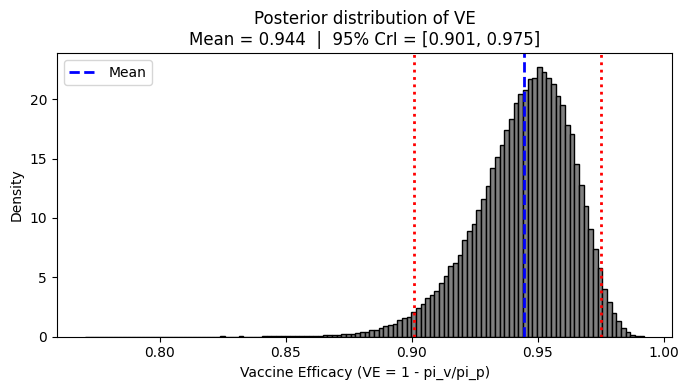

<Figure size 640x480 with 0 Axes>

In [1]:
# ---- Librerie ----
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import beta

# ---- INPUT: replace these with your observed counts ----
# Example (illustrative only): vaccine group 8 cases, placebo 162 cases
Y_v = 8      # infected in vaccine group
n_v = 18198  # total in vaccine group

Y_p = 162    # infected in placebo group
n_p = 18211  # total in placebo group
# -------------------------------------------------------

# ---- Prior (Beta(alpha,beta)) ----
alpha0 = 1
beta0  = 1

# Posterior parameters
alpha_v_post = alpha0 + Y_v
beta_v_post  = beta0  + n_v - Y_v

alpha_p_post = alpha0 + Y_p
beta_p_post  = beta0  + n_p - Y_p

# Print posterior params
print(f"Vaccine posterior: Beta({alpha_v_post}, {beta_v_post})")
print(f"Placebo posterior: Beta({alpha_p_post}, {beta_p_post})\n")

# ---- Analytical posterior means and credible intervals for pi ----
mean_pi_v = alpha_v_post / (alpha_v_post + beta_v_post)
mean_pi_p = alpha_p_post / (alpha_p_post + beta_p_post)
print(f"Posterior mean pi_v = {mean_pi_v:.6f}")
print(f"Posterior mean pi_p = {mean_pi_p:.6f}\n")

# ---- Draw posterior samples and compute VE samples ----
S = 200_000  # number of posterior samples
np.random.seed(12345)
pi_v_s = np.random.beta(alpha_v_post, beta_v_post, size=S)
pi_p_s = np.random.beta(alpha_p_post, beta_p_post, size=S)

# compute VE = 1 - pi_v/pi_p
ve_s = 1 - (pi_v_s / pi_p_s)

# Compute mean, median and 95% credible interval
ve_mean = ve_s.mean()
ve_med  = np.median(ve_s)
ve_ci   = np.quantile(ve_s, [0.025, 0.975])

print(f"VE posterior mean = {ve_mean:.3f}")
print(f"VE posterior median = {ve_med:.3f}")
print(f"VE 95% CrI = [{ve_ci[0]:.3f}, {ve_ci[1]:.3f}]\n")

# ---- Plot 1: posterior Beta densities for pi_v and pi_p ----
x = np.linspace(0, max(pi_v_s.max(), pi_p_s.max())*1.3, 1000)
dens_v = beta.pdf(x, alpha_v_post, beta_v_post)
dens_p = beta.pdf(x, alpha_p_post, beta_p_post)

df = pd.DataFrame({
    "x": np.tile(x, 2),
    "density": np.concatenate([dens_v, dens_p]),
    "group": ["Vaccine"]*len(x) + ["Placebo"]*len(x)
})

plt.figure(figsize=(7,4))
for g, grp in df.groupby("group"):
    plt.plot(grp["x"], grp["density"], label=g, lw=2, linestyle='--' if g=="Placebo" else '-')
plt.xlabel(r"$\pi$")
plt.ylabel("Density")
plt.title(f"Posterior Beta densities: Vaccine vs Placebo\nPriors Beta({alpha0},{beta0})  |  Data: Y_v={Y_v}, n_v={n_v}  |  Y_p={Y_p}, n_p={n_p}")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

# ---- Plot 2: posterior distribution of VE ----
plt.figure(figsize=(7,4))
plt.hist(ve_s, bins=120, density=True, color="grey", edgecolor="black")
plt.axvline(ve_mean, color="blue", linestyle='dashed', lw=2, label="Mean")
plt.axvline(ve_ci[0], color="red", linestyle='dotted', lw=2)
plt.axvline(ve_ci[1], color="red", linestyle='dotted', lw=2)
plt.xlabel("Vaccine Efficacy (VE = 1 - pi_v/pi_p)")
plt.ylabel("Density")
plt.title(f"Posterior distribution of VE\nMean = {ve_mean:.3f}  |  95% CrI = [{ve_ci[0]:.3f}, {ve_ci[1]:.3f}]")
plt.legend()
plt.tight_layout()
plt.show()

# ---- Optionally save plots to files ----
plt.savefig("posterior_ve.png", dpi=300)